#### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Rating Data

In [2]:
# Loading DataFrame from csv
df = pd.read_csv('input_data\\rating.csv')

# Display the first 2 rows
df.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


In [3]:
# Drop timestamp column
df = df.drop(columns=['timestamp'])

# Display the first 2 rows
df.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


# RATINGS ANALYSIS

####  Rating Statistics

In [4]:
# Avoid scientific digital format
pd.options.display.float_format = '{:.2f}'.format

# Display rating statistics
print(df['rating'].describe())

count   20000263.00
mean           3.53
std            1.05
min            0.50
25%            3.00
50%            3.50
75%            4.00
max            5.00
Name: rating, dtype: float64


#### Distribution of Ratings

In [5]:
# Instantiate an empty DataFrame to store the rating analysis results
df_rating = pd.DataFrame()

# Calculate the count of each unique rating value in the 'rating' column of df,
# sort them in descending order, and store the result in a new column 'counts' of df_rating.
df_rating['counts'] = df['rating'].value_counts().sort_index(ascending=False)

# Calculate the percentage of each rating by dividing the counts by the total number of ratings,
# multiply by 100 to get a percentage, and round the result. Store this in the 'percentage' column of df_rating.
df_rating['percentage'] = round(df_rating['counts'] / len(df) * 100)

# Display the df_rating DataFrame, which now contains the counts and percentage of each rating value.
df_rating


,counts,percentage
rating,,
5.00,2898660,14.00
4.50,1534824,8.00
4.00,5561926,28.00
3.50,2200156,11.00
3.00,4291193,21.00
2.50,883398,4.00
2.00,1430997,7.00
1.50,279252,1.00
1.00,680732,3.00


#### Visualization of Distribution

<Axes: xlabel='rating', ylabel='count'>

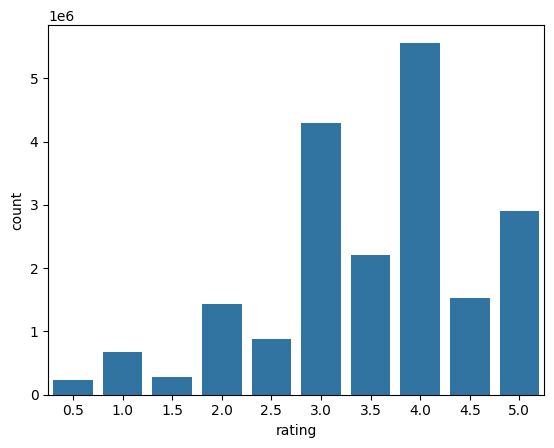

In [6]:
# Create a count plot of the ratings distribution 
sns.countplot(x='rating',data=df)

# USERS ANALYSIS

#### Number of unique Users = 138K

In [7]:
# Return the number of unique 'userId' values in the DataFrame, indicating the total number of distinct users.
df['userId'].nunique()


138493

#### Counting the number of rating per user

In [8]:
# Add a 'ratings_per_user' column with the count of ratings per 'userId'.
df['ratings_per_user'] = df.groupby('userId')['userId'].transform('count')

# Display the first 2 rows
df.head(2)

,userId,movieId,rating,ratings_per_user
0,1,2,3.50,175
1,1,29,3.50,175


#### Number of occurence of quantity of ratings par user
We notice that the top of this list is filled with small quantities like from 20's to 50's

In [9]:
# Print the counts of the 20 most common 'ratings_per_user' values.
print(df['ratings_per_user'].value_counts()[:20])


ratings_per_user
20     89700
100    72700
21     65184
50     62550
22     62304
23     60743
25     59975
101    59691
30     58020
24     56760
28     56448
26     56264
40     55760
29     55738
35     55265
32     55264
55     55110
51     55029
33     54813
31     54560
Name: count, dtype: int64


#### Ratings per user Statistics

In [10]:
# Print summary statistics for the 'ratings_per_user' column.
print(df['ratings_per_user'].describe())


count   20000263.00
mean         511.57
std          663.36
min           20.00
25%          123.00
50%          296.00
75%          644.00
max         9254.00
Name: ratings_per_user, dtype: float64


#### Calculating average rating per User

In [11]:
# Add a new column 'avg_user_rating' with the average rating given by each user.
# This is calculated by grouping the data by 'userId' and then taking the mean of the 'rating' column.
df['avg_user_rating'] = df.groupby('userId')['rating'].transform('mean')

# Display the first 2 rows
df.head(2)


,userId,movieId,rating,ratings_per_user,avg_user_rating
0,1,2,3.50,175,3.74
1,1,29,3.50,175,3.74


#### Showing a scatterplot of the number of ratings per user for each individual average user rating

<Axes: xlabel='avg_user_rating', ylabel='ratings_per_user'>

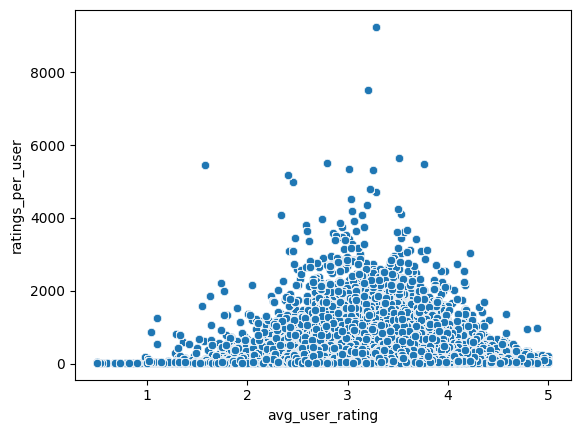

In [12]:
# Create a scatter plot using Seaborn to visualize the relationship between the average user rating ('avg_user_rating') 
# and the number of ratings per user ('ratings_per_user').
sns.scatterplot(x='avg_user_rating', y='ratings_per_user', data=df)


In this scatterplot we notice that the more a user is engaged in rating, the closest he/she gets to the average rating (3.52). It's the first clue that there's a need to filter the DataFrame.

#### Top and Bottom active users
We notice a very diverse activity going from 20 ratings for the bottom user to 9254 ratings for the top user.

In [13]:
# Print the counts of each unique 'userId', sorted in descending order.
# This provides a view of how many entries exist for each user, with the most frequent users listed first.
print(df['userId'].value_counts(ascending=False))


userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64


#### Showing the frequency of the number of rating per user

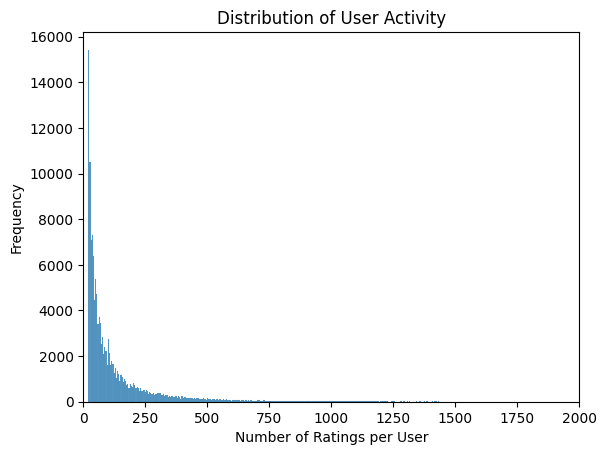

In [14]:
# Count the number of occurrences of each userId
user_counts = df['userId'].value_counts()

# Creating a DataFrame with these occurrences
df_plot = pd.DataFrame({'userId': user_counts.index, 'counts': user_counts.values})

# Show the distribution of these occurrences
sns.histplot(data=df_plot, x='counts')

# Limit the x axis to 2000 ratings
plt.xlim(0, 2000) 

# Add titles et labels
plt.title('Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

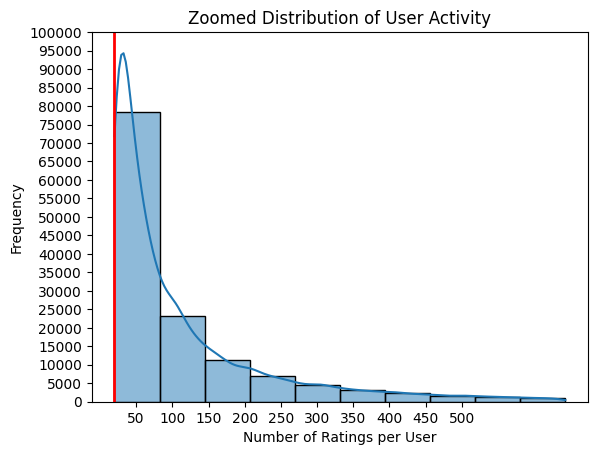

In [15]:
# Filter the DataFrame 'df_plot' to include only rows where the 'counts' value is less than 644.
df_plot_filtered = df_plot[df_plot['counts'] < 644]

# Create a histogram of the 'counts' column from the filtered DataFrame.
# Use 10 bins and add a kernel density estimate (kde) to the plot.
sns.histplot(data=df_plot_filtered, x='counts', bins=10, kde=True)

# Add a vertical red line at x=20 to the histogram to highlight a specific value.
plt.axvline(x=20, color='red', linestyle='-', linewidth=2)

# Set the ticks on the x-axis to range from 50 to 500 at intervals of 50.
plt.xticks(ticks=range(50, 501, 50))

# Set the ticks on the y-axis to range from 0 to 100000 at intervals of 5000.
plt.yticks(ticks=range(0, 100001, 5000))

# Set the title of the plot.
plt.title('Zoomed Distribution of User Activity')

# Set the label for the x-axis.
plt.xlabel('Number of Ratings per User')

# Set the label for the y-axis.
plt.ylabel('Frequency')

# Display the plot.
plt.show()


#### Analyzing User Ratings Distribution With a Boxplot

The IQR and the median are getting smaller as the ratings are rising. This indicate that users with low quantity of ratings are giving better ratings.

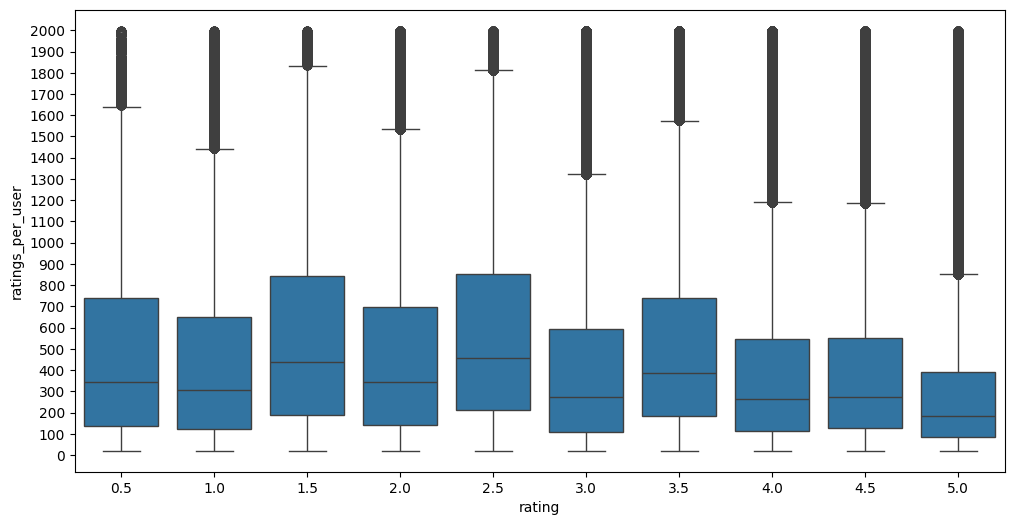

In [16]:
# Filter the DataFrame 'df' to include only rows where 'ratings_per_user' is less than 2000.
df_filtered = df[df['ratings_per_user'] < 2000]

# Create a new figure with a specified size of 12 by 6 inches.
plt.figure(figsize=(12,6))

# Create a box plot with 'rating' on the x-axis and 'ratings_per_user' on the y-axis from the filtered DataFrame.
sns.boxplot(x='rating', y='ratings_per_user', data=df_filtered)

# Set the ticks on the y-axis to range from 0 to 2000 at intervals of 100.
plt.yticks(ticks=range(0, 2001, 100))

# Display the plot.
plt.show()


In [17]:
# Normalize the 'ratings_per_user' values to obtain a user engagement rate between 0 and 1.
# This is done by subtracting the minimum value of 'ratings_per_user' from each value and then dividing by the range 
# (difference between the maximum and minimum values) to scale the values to a [0, 1] range.
df['user_engagement_rate'] = (df['ratings_per_user'] - df['ratings_per_user'].min()) / (df['ratings_per_user'].max() - df['ratings_per_user'].min())

# Display the first 2 rows
df.head(2)


,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate
0,1,2,3.50,175,3.74,0.02
1,1,29,3.50,175,3.74,0.02


# MOVIES ANALYSIS

#### Number of unique Movies = 26K

In [18]:
# Return the number of unique 'movieId' values in the DataFrame, indicating the total number of distinct movies.
df['movieId'].nunique()

26744

#### Counting Movie rating occurence

In [19]:
# Add a 'ratings_per_movie' column with the count of ratings per 'movieId'.
df['ratings_per_movie'] = df.groupby('movieId')['movieId'].transform('count')

# Display the first 2 rows
df.head(2)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie
0,1,2,3.50,175,3.74,0.02,22243
1,1,29,3.50,175,3.74,0.02,8520


In [20]:
# Create a new DataFrame 'popularity_df' that contains only the first occurrence of each 'movieId' from the original DataFrame 'df'.
# This effectively aggregates the data by movie, keeping the first row for each movie (which includes the 'ratings_per_movie' column).
popularity_df = df.groupby('movieId').first()

# Print the shape of 'popularity_df' to show the number of rows and columns.
print("rows and columns: ", popularity_df.shape)

# Print summary statistics (count, mean, std, min, quartiles, and max) for the 'ratings_per_movie' column in 'popularity_df'.
print(popularity_df['ratings_per_movie'].describe())

# Display the top 10 movies with the highest number of ratings by using 'ratings_per_movie' to sort and select the largest values.
popularity_df.nlargest(10, 'ratings_per_movie')


rows and columns:  (26744, 6)
count   26744.00
mean      747.84
std      3085.82
min         1.00
25%         3.00
50%        18.00
75%       205.00
max     67310.00
Name: ratings_per_movie, dtype: float64


,userId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie
movieId,,,,,,
296,1,4.00,175,3.74,0.02,67310
356,4,4.00,28,3.57,0.00,66172
318,1,4.00,175,3.74,0.02,63366
593,1,3.50,175,3.74,0.02,63299
480,2,5.00,61,4.00,0.00,59715
260,1,4.00,175,3.74,0.02,54502
110,2,4.00,61,4.00,0.00,53769
589,1,3.50,175,3.74,0.02,52244
2571,3,5.00,187,4.12,0.02,51334


In [21]:
# Add a new column 'avg_movie_rating' that contains the average rating for each movie.
df['avg_movie_rating'] = df.groupby('movieId')['rating'].transform('mean')

# Display the first few rows 
df.head(2)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating
0,1,2,3.50,175,3.74,0.02,22243,3.21
1,1,29,3.50,175,3.74,0.02,8520,3.95


#### Showing a scatterplot of the number of ratings per movie for each individual average movie rating

<Axes: xlabel='avg_movie_rating', ylabel='ratings_per_movie'>

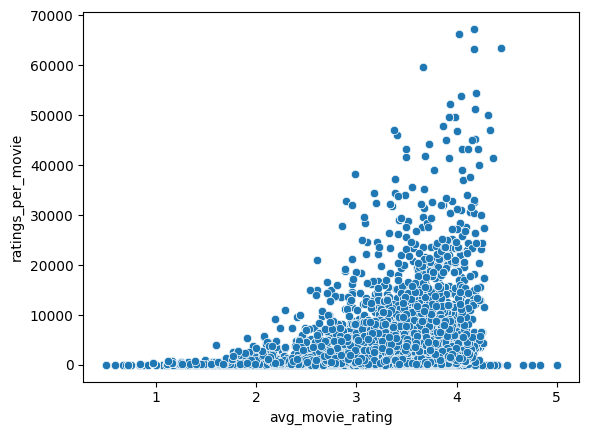

In [22]:
# Create a scatter plot using Seaborn to visualize the relationship between the average movie rating ('avg_movie_rating') 
# and the number of ratings per movie ('ratings_per_movie').
sns.scatterplot(x='avg_movie_rating', y='ratings_per_movie', data=df)

#### Top and Bottom quantity rated movies
We notice a very diverse interest for movies going from 1 rating for the bottom movies to 67310 ratings for the top movie.

In [23]:
# Print the count of each unique 'movieId' in descending order.
# This shows 5 the most frequently rated movies.
print(df['movieId'].value_counts(ascending=False)[:5])

movieId
296    67310
356    66172
318    63366
593    63299
480    59715
Name: count, dtype: int64


#### Showing the frequency of the number of rating per movie

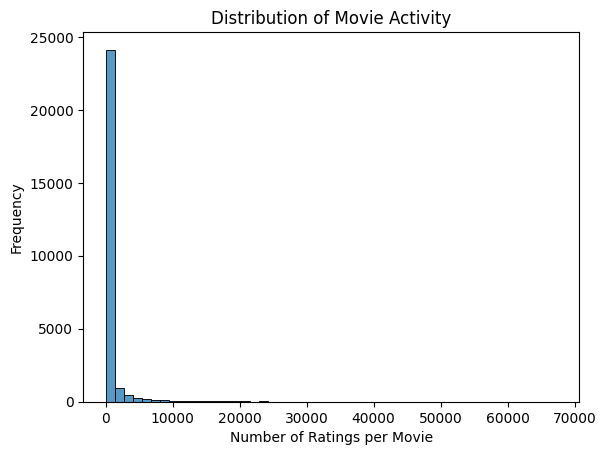

In [24]:
# Count the number of ratings for each 'movieId'.
movie_counts = df['movieId'].value_counts()

# Create a DataFrame with the count of ratings per movie.
df_plot_movie = pd.DataFrame({'movieId': movie_counts.index, 'counts': movie_counts.values})

# Plot the distribution of ratings per movie using a histogram with 50 bins.
sns.histplot(data=df_plot_movie, x='counts', bins=50)

# Add title and axis labels to the plot.
plt.title('Distribution of Movie Activity')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')

# Show the plot.
plt.show()

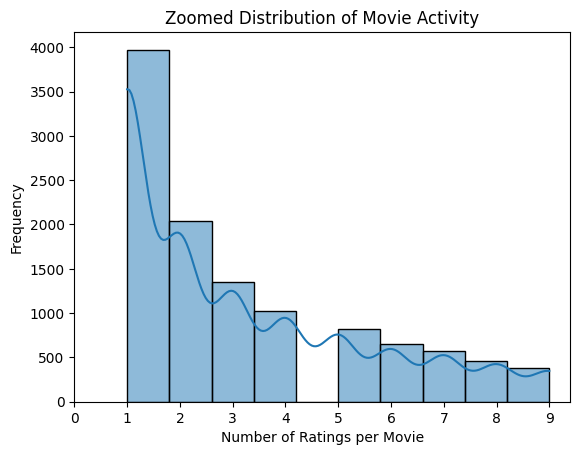

In [25]:
# Filter the DataFrame to include only movies with fewer than 10 ratings.
df_plot_filtered_movie = df_plot_movie[df_plot_movie['counts'] < 10]

# Create a histogram with a kernel density estimate (kde) to show the distribution of the number of ratings per movie.
# Use 10 bins to visualize the frequency of movies with fewer than 10 ratings.
sns.histplot(data=df_plot_filtered_movie, x='counts', bins=10, kde=True)

# Set the x-axis ticks to show integers from 0 to 9.
plt.xticks(ticks=range(0, 10, 1))

# Add title and labels to the plot.
plt.title('Zoomed Distribution of Movie Activity')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')

# Display the plot.
plt.show()


#### Analyzing Movie Ratings Distribution With a Boxplot

The boxplot analysis reveals that both the interquartile range (IQR) and the median of movie ratings increase with higher ratings. This suggests that movies with higher ratings tend to receive more votes. This trend indicates a bias in rating systems: people are generally more motivated to leave positive reviews for movies they enjoy, whereas they are less inclined to leave negative reviews for movies they dislike. In essence, individuals are less likely to spend time writing negative feedback.

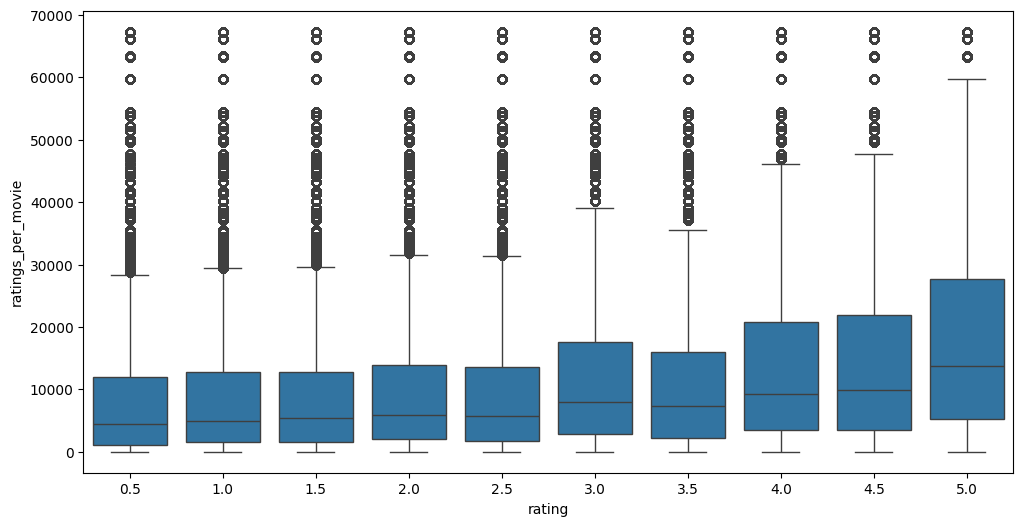

In [29]:
# Filter the DataFrame 'df' to include only rows where 'ratings_per_user' is less than 2000.
#df_movie_filtered = df[df['ratings_per_movie'] < 2000]

# Create a new figure with a specified size of 12 by 6 inches.
plt.figure(figsize=(12,6))

# Create a box plot with 'rating' on the x-axis and 'ratings_per_user' on the y-axis from the filtered DataFrame.
sns.boxplot(x='rating', y='ratings_per_movie', data=df)

# Display the plot.
plt.show()

In [26]:
# Normalize 'ratings_per_movie' to a range between 0 and 1.
# This scales the number of ratings for each movie, making it easier to compare movie popularity.
df['movie_popularity_rate'] = (df['ratings_per_movie'] - df['ratings_per_movie'].min()) / (df['ratings_per_movie'].max() - df['ratings_per_movie'].min())

# Apply a logarithmic transformation to the normalized 'movie_popularity_rate', adding 1 to avoid log(0).
# This transformation compresses the range of values, making the distribution more manageable.
df['movie_popularity_rate'] = np.log(df['movie_popularity_rate'] + 1)

# Display the first 2 rows
df.head(2)


,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,movie_popularity_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.29
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.12
